In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

## Illustration on graph

In [2]:
st = gd.SimplexTree()

In [3]:
st.insert([0,1])
st.insert([1,2])
st.insert([1,3])
st.insert([2,4])
st.insert([3,4])
st.insert([4,5])
st.insert([2,6])
st.insert([3,7])
st.assign_filtration([0], 0.)
st.assign_filtration([1], 1.)
st.assign_filtration([2], 2.)
st.assign_filtration([3], 3.)
st.assign_filtration([4], 4.)
st.assign_filtration([5], 5.)
st.assign_filtration([6], 0.5)
st.assign_filtration([7], 4.5)
_ = st.make_filtration_non_decreasing()

In [4]:
G = nx.Graph()
for (splx,_) in st.get_skeleton(1):
    if len(splx) == 1:
        G.add_node(splx[0])
    if len(splx) == 2:
        G.add_edge(splx[0], splx[1])
        
pos = {}
for idxv,v in enumerate(G.nodes()):
    y = st.filtration([v])
    if v==2:
        x=-1.
    elif v==6:
        x=-2.
    elif v==3:
        x=1.
    elif v==7:
        x=2.
    else:
        x=0
    pos[v] = [x,y]

In [5]:
%matplotlib inline

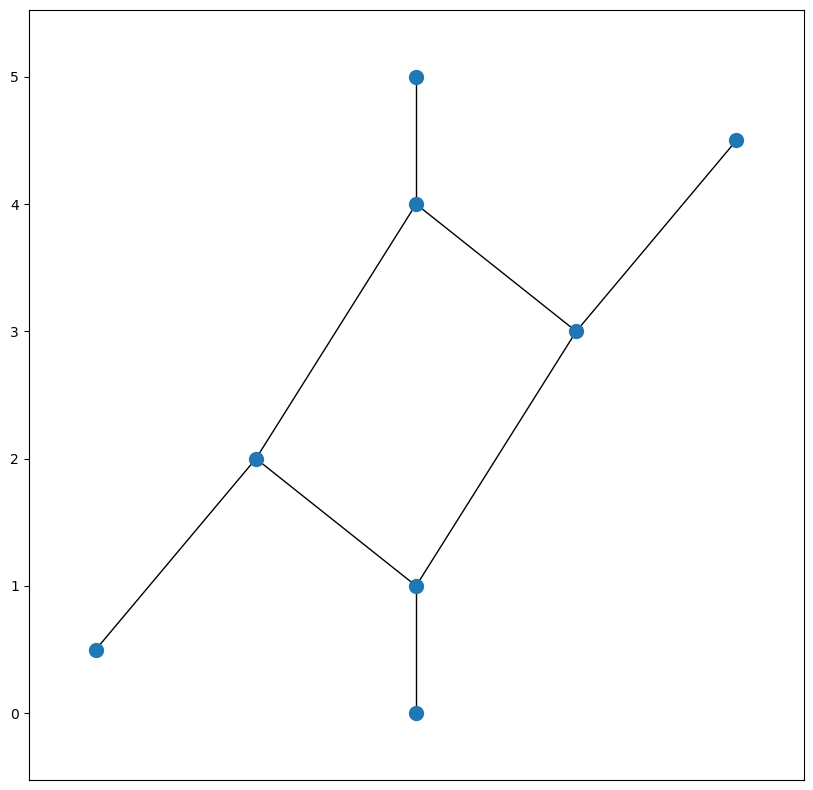

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(G, pos=pos, node_size=100, ax=ax)
limits = plt.axis('on')
ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
plt.show()

usetex mode requires ghostscript.


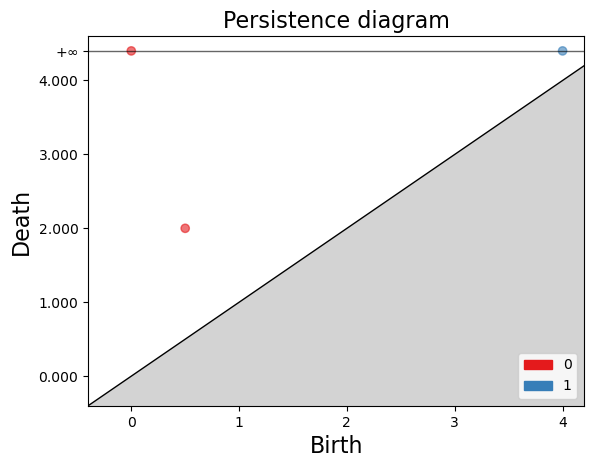

In [7]:
dgm = st.persistence(persistence_dim_max=True)
gd.plot_persistence_diagram(dgm)
plt.show()

In [8]:
st.extend_filtration()

In [9]:
for (s,f) in st.get_filtration():
    print(s,f)

[8] -3.0
[0] -2.0
[6] -1.9
[1] -1.8
[0, 1] -1.8
[2] -1.6
[1, 2] -1.6
[2, 6] -1.6
[3] -1.4
[1, 3] -1.4
[4] -1.2
[2, 4] -1.2
[3, 4] -1.2
[7] -1.1
[3, 7] -1.1
[5] -1.0
[4, 5] -1.0
[5, 8] 1.0
[7, 8] 1.1
[4, 8] 1.2
[4, 5, 8] 1.2
[3, 8] 1.4
[3, 4, 8] 1.4
[3, 7, 8] 1.4
[2, 8] 1.6
[2, 4, 8] 1.6
[1, 8] 1.8
[1, 2, 8] 1.8
[1, 3, 8] 1.8
[6, 8] 1.9
[2, 6, 8] 1.9
[0, 8] 2.0
[0, 1, 8] 2.0


In [10]:
dgms = st.extended_persistence(min_persistence=1e-5)

In [11]:
print(dgms)

[[(0, (0.5000000000000004, 1.9999999999999996))], [(1, (4.5, 3.0000000000000004))], [(0, (0.0, 5.0))], [(1, (4.0, 0.9999999999999998))]]


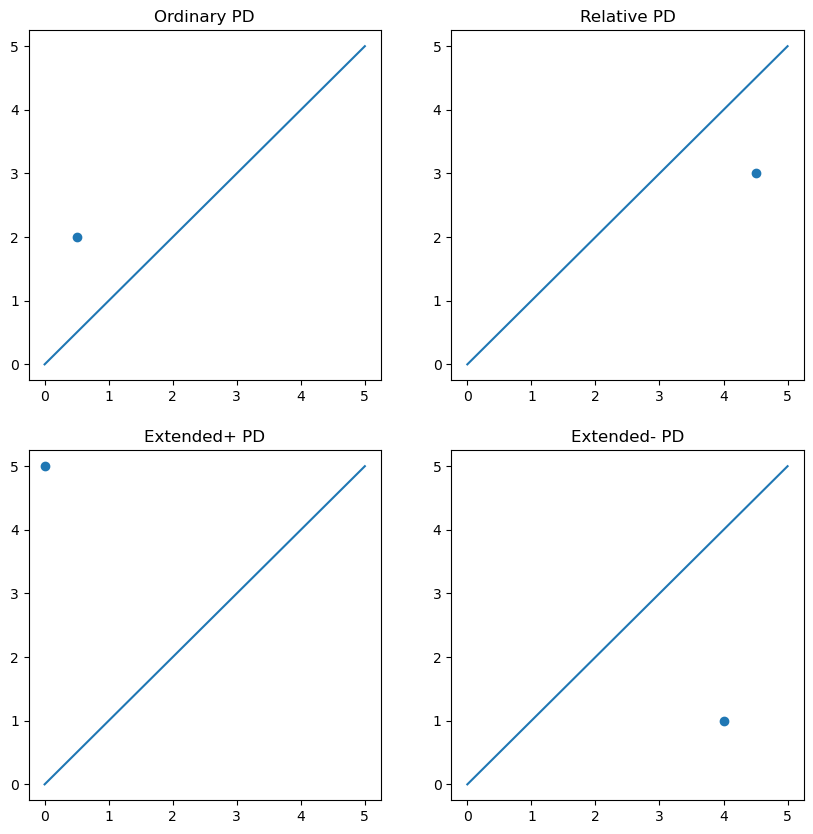

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0]))], [dgms[0][i][1][1] for i in range(len(dgms[0]))])
axs[0,0].plot([0,5],[0,5])
axs[0,0].set_title("Ordinary PD")
axs[0,1].scatter([dgms[1][i][1][0] for i in range(len(dgms[1]))], [dgms[1][i][1][1] for i in range(len(dgms[1]))])
axs[0,1].plot([0,5],[0,5])
axs[0,1].set_title("Relative PD")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2]))], [dgms[2][i][1][1] for i in range(len(dgms[2]))])
axs[1,0].plot([0,5],[0,5])
axs[1,0].set_title("Extended+ PD")
axs[1,1].scatter([dgms[3][i][1][0] for i in range(len(dgms[3]))], [dgms[3][i][1][1] for i in range(len(dgms[3]))])
axs[1,1].plot([0,5],[0,5])
axs[1,1].set_title("Extended- PD")
plt.show()

### Application on 3D Shape

In [13]:
triangles = np.loadtxt('../datasets/human.off', dtype=int)[:,1:]
coords = np.loadtxt('../datasets/human.txt', dtype=float)

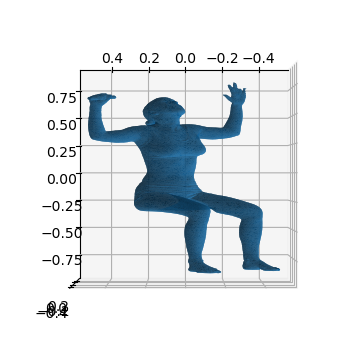

In [14]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_trisurf(coords[:,0], coords[:,1], coords[:,2], triangles=triangles)
ax.view_init(-90,90)
plt.show()

In [15]:
st = gd.SimplexTree()

In [16]:
for i in range(len(triangles)):
    st.insert([v for v in triangles[i,:]], -10)
for i in range(len(coords)):
    st.assign_filtration([i],coords[i,1])
_ = st.make_filtration_non_decreasing()

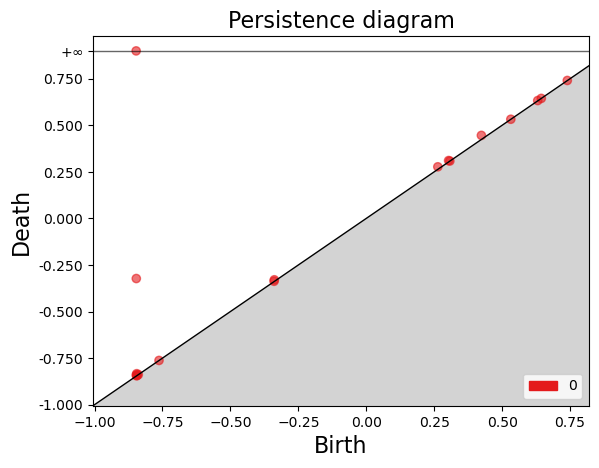

In [17]:
dgm = st.persistence(persistence_dim_max=True)
gd.plot_persistence_diagram([pt for pt in dgm if pt[0]==0])
plt.show()

In [18]:
st.extend_filtration()
dgms = st.extended_persistence(min_persistence=1e-5)

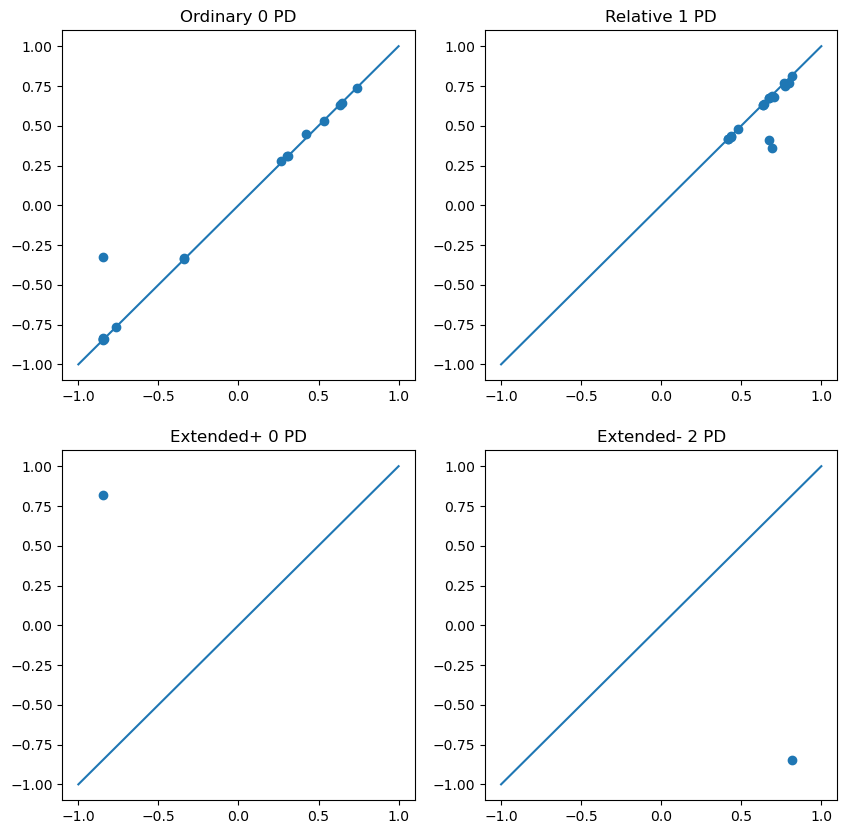

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0])) if dgms[0][i][0] == 0], 
                 [dgms[0][i][1][1] for i in range(len(dgms[0])) if dgms[0][i][0] == 0])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Ordinary 0 PD")
axs[0,1].scatter([dgms[1][i][1][0] for i in range(len(dgms[1])) if dgms[1][i][0] == 1], 
                 [dgms[1][i][1][1] for i in range(len(dgms[1])) if dgms[1][i][0] == 1])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Relative 1 PD")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2])) if dgms[2][i][0] == 0], 
                 [dgms[2][i][1][1] for i in range(len(dgms[2])) if dgms[2][i][0] == 0])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Extended+ 0 PD")
axs[1,1].scatter([dgms[3][i][1][0] for i in range(len(dgms[3])) if dgms[3][i][0] == 2], 
                 [dgms[3][i][1][1] for i in range(len(dgms[3])) if dgms[3][i][0] == 2])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Extended- 2 PD")
plt.show()

### Symmetry Theorems

In [20]:
st2 = gd.SimplexTree()

In [21]:
for i in range(len(triangles)):
    st2.insert([v for v in triangles[i,:]], -10)
for i in range(len(coords)):
    st2.assign_filtration([i], -coords[i,1])
_ = st2.make_filtration_non_decreasing()

In [22]:
st2.extend_filtration()
dgms2 = st2.extended_persistence(min_persistence=1e-5)

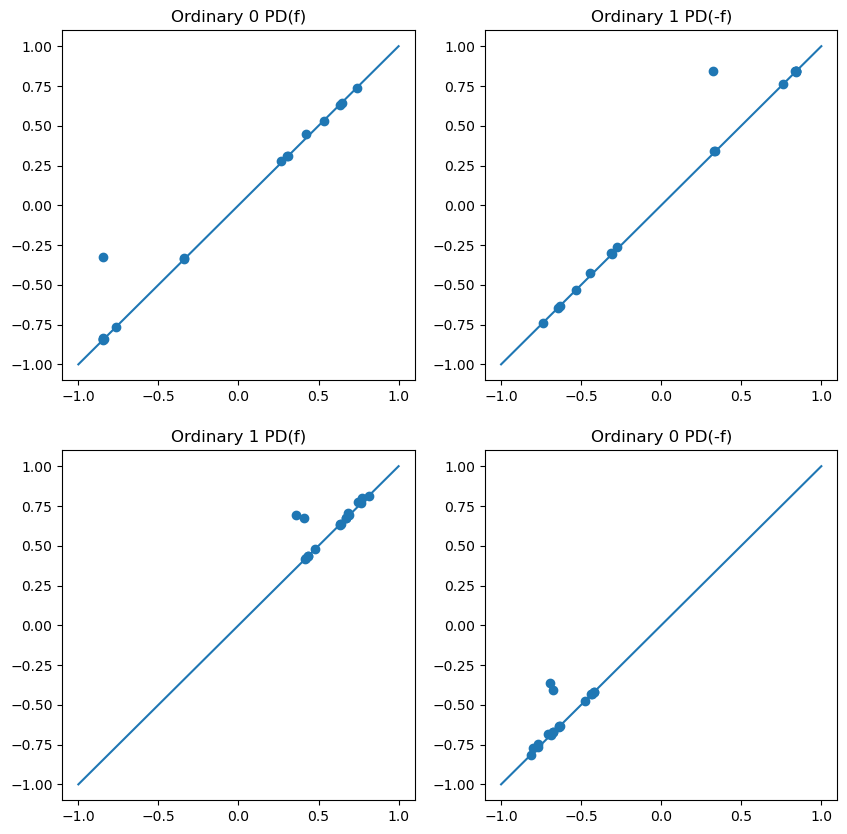

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0])) if dgms[0][i][0] == 0], 
                 [dgms[0][i][1][1] for i in range(len(dgms[0])) if dgms[0][i][0] == 0])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Ordinary 0 PD(f)")
axs[0,1].scatter([dgms2[0][i][1][0] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 1], 
                 [dgms2[0][i][1][1] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 1])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Ordinary 1 PD(-f)")
axs[1,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0])) if dgms[0][i][0] == 1], 
                 [dgms[0][i][1][1] for i in range(len(dgms[0])) if dgms[0][i][0] == 1])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Ordinary 1 PD(f)")
axs[1,1].scatter([dgms2[0][i][1][0] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 0], 
                 [dgms2[0][i][1][1] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 0])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Ordinary 0 PD(-f)")
plt.show()

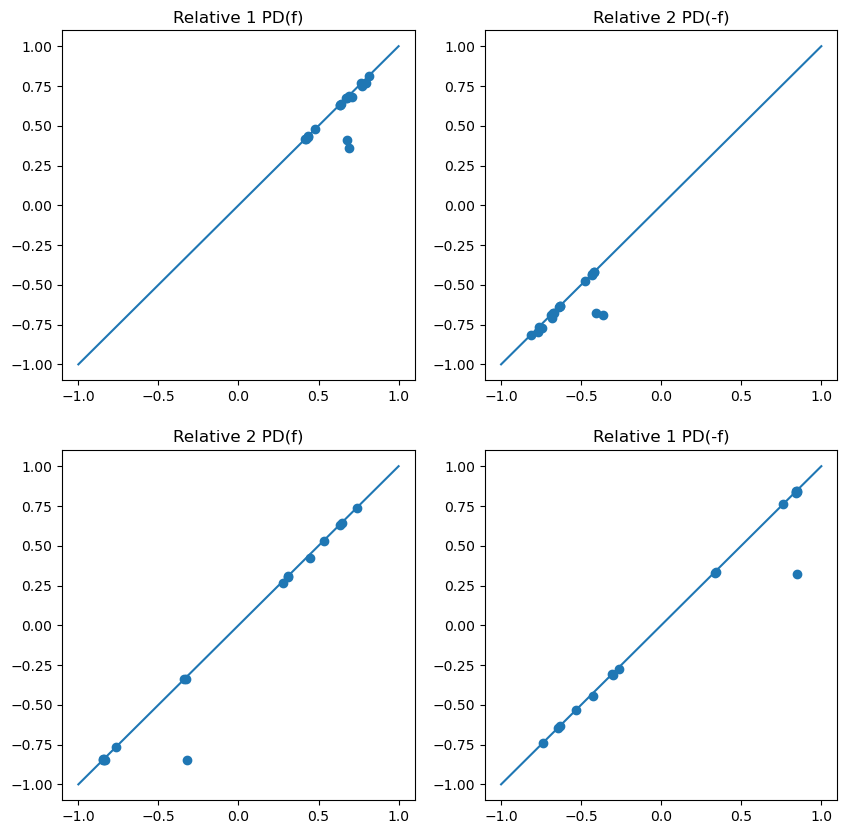

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[1][i][1][0] for i in range(len(dgms[1])) if dgms[1][i][0] == 1], 
                 [dgms[1][i][1][1] for i in range(len(dgms[1])) if dgms[1][i][0] == 1])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Relative 1 PD(f)")
axs[0,1].scatter([dgms2[1][i][1][0] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 2], 
                 [dgms2[1][i][1][1] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 2])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Relative 2 PD(-f)")
axs[1,0].scatter([dgms[1][i][1][0] for i in range(len(dgms[1])) if dgms[1][i][0] == 2], 
                 [dgms[1][i][1][1] for i in range(len(dgms[1])) if dgms[1][i][0] == 2])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Relative 2 PD(f)")
axs[1,1].scatter([dgms2[1][i][1][0] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 1], 
                 [dgms2[1][i][1][1] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 1])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Relative 1 PD(-f)")
plt.show()

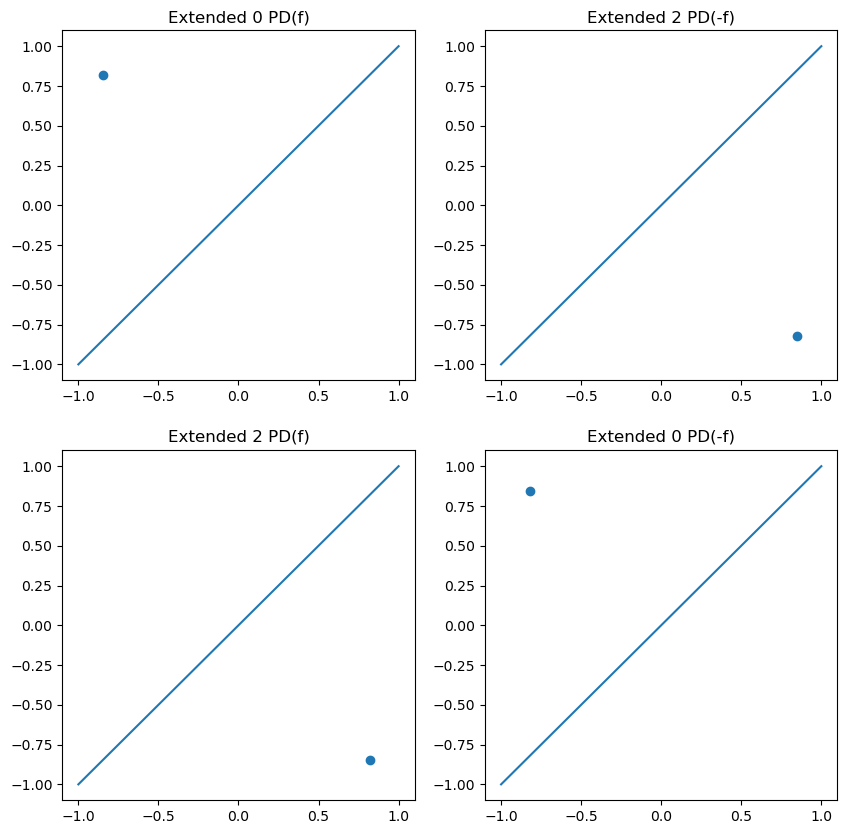

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2])) if dgms[2][i][0] == 0] + 
                 [dgms[3][i][1][0] for i in range(len(dgms[3])) if dgms[3][i][0] == 0], 
                 [dgms[2][i][1][1] for i in range(len(dgms[2])) if dgms[2][i][0] == 0] +
                 [dgms[3][i][1][1] for i in range(len(dgms[3])) if dgms[3][i][0] == 0])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Extended 0 PD(f)")
axs[0,1].scatter([dgms2[2][i][1][0] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 2] + 
                 [dgms2[3][i][1][0] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 2], 
                 [dgms2[2][i][1][1] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 2] + 
                 [dgms2[3][i][1][1] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 2])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Extended 2 PD(-f)")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2])) if dgms[2][i][0] == 2] + 
                 [dgms[3][i][1][0] for i in range(len(dgms[3])) if dgms[3][i][0] == 2], 
                 [dgms[2][i][1][1] for i in range(len(dgms[2])) if dgms[2][i][0] == 2] +
                 [dgms[3][i][1][1] for i in range(len(dgms[3])) if dgms[3][i][0] == 2])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Extended 2 PD(f)")
axs[1,1].scatter([dgms2[2][i][1][0] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 0] + 
                 [dgms2[3][i][1][0] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 0], 
                 [dgms2[2][i][1][1] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 0] + 
                 [dgms2[3][i][1][1] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 0])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Extended 0 PD(-f)")
plt.show()

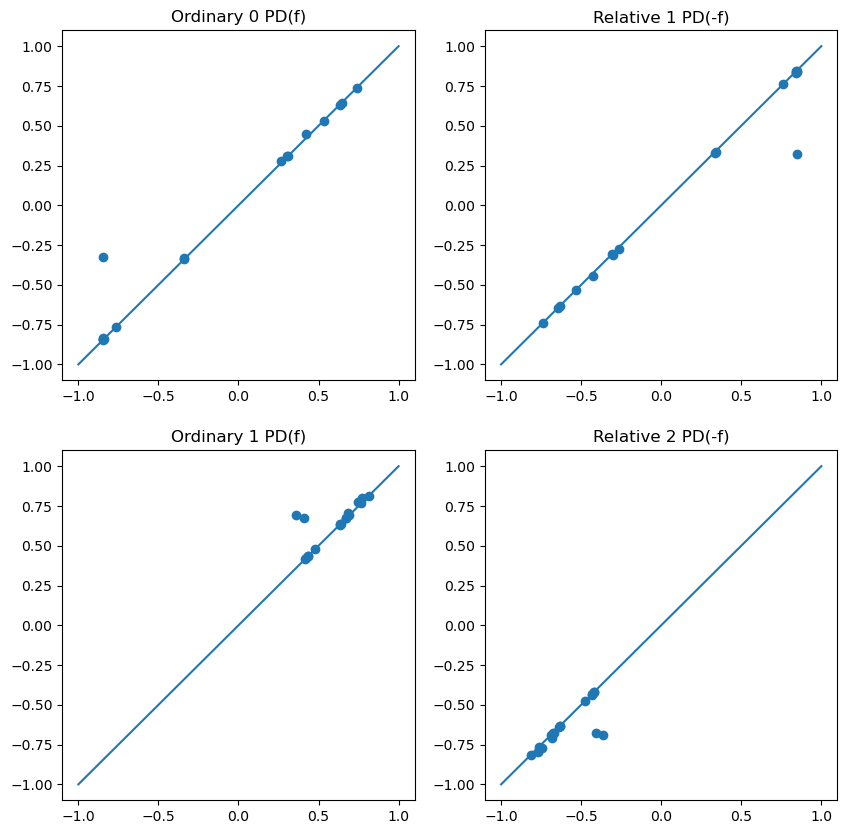

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0])) if dgms[0][i][0] == 0], 
                 [dgms[0][i][1][1] for i in range(len(dgms[0])) if dgms[0][i][0] == 0])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Ordinary 0 PD(f)")
axs[0,1].scatter([dgms2[1][i][1][0] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 1], 
                 [dgms2[1][i][1][1] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 1])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Relative 1 PD(-f)")
axs[1,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0])) if dgms[0][i][0] == 1], 
                 [dgms[0][i][1][1] for i in range(len(dgms[0])) if dgms[0][i][0] == 1])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Ordinary 1 PD(f)")
axs[1,1].scatter([dgms2[1][i][1][0] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 2], 
                 [dgms2[1][i][1][1] for i in range(len(dgms2[1])) if dgms2[1][i][0] == 2])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Relative 2 PD(-f)")
plt.show()

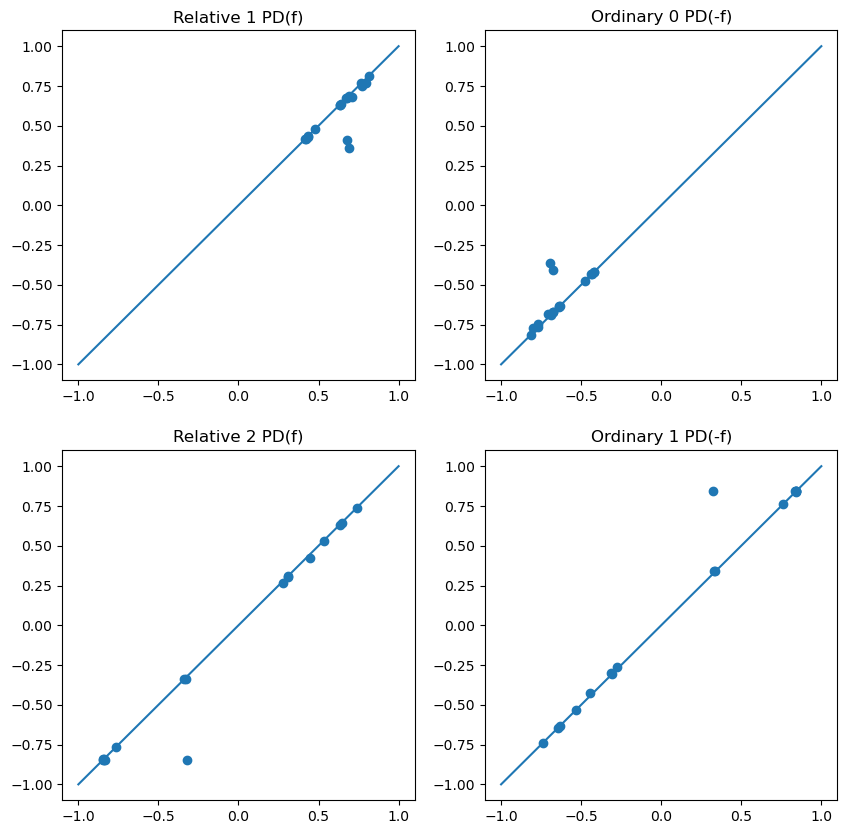

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[1][i][1][0] for i in range(len(dgms[1])) if dgms[1][i][0] == 1], 
                 [dgms[1][i][1][1] for i in range(len(dgms[1])) if dgms[1][i][0] == 1])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Relative 1 PD(f)")
axs[0,1].scatter([dgms2[0][i][1][0] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 0], 
                 [dgms2[0][i][1][1] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 0])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Ordinary 0 PD(-f)")
axs[1,0].scatter([dgms[1][i][1][0] for i in range(len(dgms[1])) if dgms[1][i][0] == 2], 
                 [dgms[1][i][1][1] for i in range(len(dgms[1])) if dgms[1][i][0] == 2])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Relative 2 PD(f)")
axs[1,1].scatter([dgms2[0][i][1][0] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 1], 
                 [dgms2[0][i][1][1] for i in range(len(dgms2[0])) if dgms2[0][i][0] == 1])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Ordinary 1 PD(-f)")
plt.show()

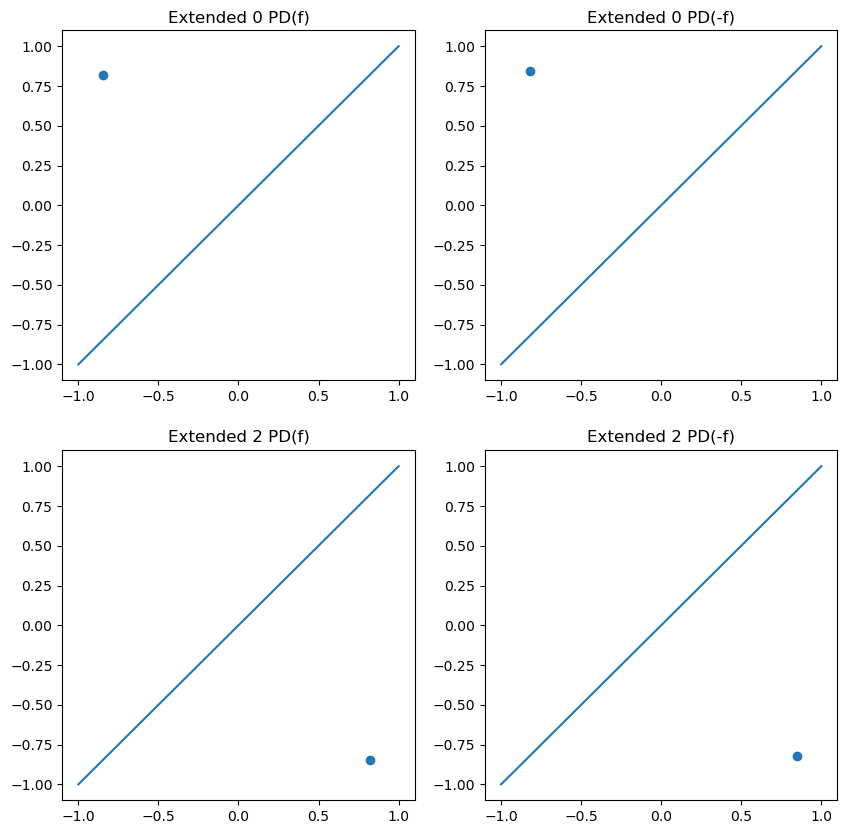

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2])) if dgms[2][i][0] == 0] + 
                 [dgms[3][i][1][0] for i in range(len(dgms[3])) if dgms[3][i][0] == 0], 
                 [dgms[2][i][1][1] for i in range(len(dgms[2])) if dgms[2][i][0] == 0] +
                 [dgms[3][i][1][1] for i in range(len(dgms[3])) if dgms[3][i][0] == 0])
axs[0,0].plot([-1,1],[-1,1])
axs[0,0].set_title("Extended 0 PD(f)")
axs[0,1].scatter([dgms2[2][i][1][0] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 0] + 
                 [dgms2[3][i][1][0] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 0], 
                 [dgms2[2][i][1][1] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 0] + 
                 [dgms2[3][i][1][1] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 0])
axs[0,1].plot([-1,1],[-1,1])
axs[0,1].set_title("Extended 0 PD(-f)")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2])) if dgms[2][i][0] == 2] + 
                 [dgms[3][i][1][0] for i in range(len(dgms[3])) if dgms[3][i][0] == 2], 
                 [dgms[2][i][1][1] for i in range(len(dgms[2])) if dgms[2][i][0] == 2] +
                 [dgms[3][i][1][1] for i in range(len(dgms[3])) if dgms[3][i][0] == 2])
axs[1,0].plot([-1,1],[-1,1])
axs[1,0].set_title("Extended 2 PD(f)")
axs[1,1].scatter([dgms2[2][i][1][0] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 2] + 
                 [dgms2[3][i][1][0] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 2], 
                 [dgms2[2][i][1][1] for i in range(len(dgms2[2])) if dgms2[2][i][0] == 2] + 
                 [dgms2[3][i][1][1] for i in range(len(dgms2[3])) if dgms2[3][i][0] == 2])
axs[1,1].plot([-1,1],[-1,1])
axs[1,1].set_title("Extended 2 PD(-f)")
plt.show()